Coursework: Evidence for Global Warming?

By Ida Johanne Austad

In [1]:
# Import the packages we need
import math 
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as sp
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Fit a GP regression for the decades 1990 and 2004

In [2]:
#Importing data for sea ice coverage for 1990 and 2004 
training_data = pd.read_csv( "revised_all_GP_training.csv" )
print(training_data.head())         #looking at the data  

   Unnamed: 0  Day  Month  Decade  Mean.Extent  Var.Extent  Ordinal.Date
0           0    1      1    1990    13.966625    0.058241           1.0
1           1   15      1    1990    14.597125    0.036833          15.0
2           2    1      2    1990    15.198375    0.066743          32.0
3           3   15      2    1990    15.468875    0.024467          46.0
4           4    1      3    1990    15.613250    0.061991          60.0


Creating our vectors for x (ordinal dates) and y (mean sea ice cover) values, plus variance of y

In [3]:
#for 1990
bool_1990 = np.any([(training_data['Decade'] == 1990)], axis=0)
x_train_1990 = training_data.loc[bool_1990,:]['Ordinal.Date']
y_train_1990 = training_data.loc[bool_1990,:]['Mean.Extent']
y_var_1990 = training_data.loc[bool_1990,:]['Var.Extent']

#for 2004
bool_2004 = np.any([(training_data['Decade'] == 2004)], axis=0)
x_train_2004 = training_data.loc[bool_2004,:]['Ordinal.Date']
y_train_2004 = training_data.loc[bool_2004,:]['Mean.Extent']
y_var_2004 = training_data.loc[bool_2004,:]['Var.Extent']

Constructing a kernel, setting an intial length and amplitude. Then fit GP regression models for each decade

In [4]:
#for 1990 
initial_ell90 = (np.amax(x_train_1990) - np.amin(x_train_1990)) / 10  
initial_scale90 = np.var( y_train_1990 )                        
rbf_kernel90 = initial_scale90 * RBF(length_scale=initial_ell90, 
    length_scale_bounds=(initial_ell90/20, 5 * initial_ell90))  

# Construct the GP object for 1990
gp_1990 = GaussianProcessRegressor( kernel=rbf_kernel90, alpha=y_var_1990 )

In [ ]:
x_vec_1990 = x_train_1990[:, np.newaxis] #makes x into a column vector
gp_1990.fit( x_vec_1990, y_train_1990 )       

In [7]:
#for 2004
initial_ell04 = (np.amax(x_train_2004) - np.amin(x_train_2004)) / 10    
initial_scale04 = np.var( y_train_2004 )                      
rbf_kernel04 = initial_scale04 * RBF(length_scale=initial_ell04, 
    length_scale_bounds=(initial_ell04/20, 5 * initial_ell04))  

# Construct the GP object for 2004
gp_2004 = GaussianProcessRegressor( kernel=rbf_kernel04, alpha=y_var_2004 )

In [ ]:
x_vec_2004 = x_train_2004[:, np.newaxis] #makes x into a column vector
gp_2004.fit( x_vec_2004, y_train_2004 )       

# From each model, generate a large number of random annual traces and estimate the minimum of the sea ice cover over the year.

In [9]:
#Creating vecor which represents a year and specify number of traces
year =range(1,366)                      #length 365
x_year = np.array(year)[:, np.newaxis]
nSamples = 1000

In [10]:
#Predict using the Gaussian process regression model
y_mean90, y_std90 = gp_1990.predict(x_year, return_std=True) 
# .sample_y: draw samples from Gaussian process and evaluate at X. 
#Returns 2D numpy array with 365 rows and 1000 columns
y_samples_1990 = gp_1990.sample_y(x_year, nSamples)    

y_mean04, y_std04 = gp_2004.predict(x_year, return_std=True)
y_samples_2004 = gp_2004.sample_y(x_year, nSamples)

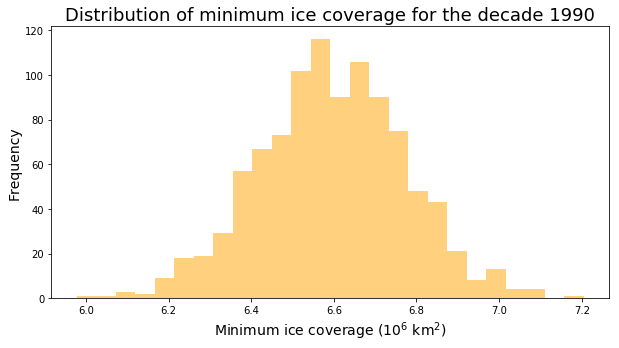

In [11]:
#Get minimums for 1990 traces and plot these by
#Creating table to hold min values for each trace
#Make transpose of sample table so that we can get min from each row

min_temp_1990 = np.empty(0)                 
array90 = np.transpose(y_samples_1990)      
for row in array90:
    min = np.amin(row)
    min_temp_1990 = np.append(min_temp_1990, min)

# Plot histograms
minhist_1990 = plt.figure(figsize=[10,5])
plt.hist( min_temp_1990, bins='fd', color='orange', alpha=0.5 )
plt.xlabel('Minimum ice coverage ($10^6$ km$^2$)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of minimum ice coverage for the decade 1990', fontsize=18)

plt.show()

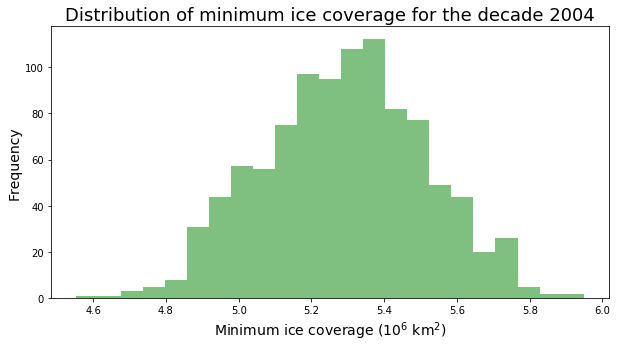

In [12]:
#Get minimums for 2004 traces and plot these
min_temp_2004 = np.empty(0)                 
array04 = np.transpose(y_samples_2004)         
for row in array04:
    min = np.amin(row)
    min_temp_2004 = np.append(min_temp_2004, min)

# Plot histograms
minhist_2004 = plt.figure(figsize=[10,5])
plt.hist( min_temp_2004, bins='fd', color='green', alpha=0.5 )
plt.xlabel('Minimum ice coverage ($10^6$ km$^2$)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of minimum ice coverage for the decade 2004', fontsize=18)

plt.show()

# Investigation: Are the minima generated from the 2004 model and the 1990 model compatible or different? And is the minima getting deeper over the years?

Start out by plotting the distribution of the minimas for 1990 and 2004 together to investigate if there is any difference. 

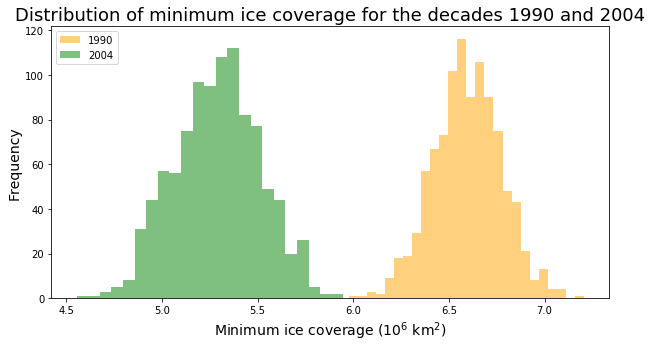

In [13]:
plt.figure(figsize=[10,5])
plt.hist( min_temp_1990, bins='fd', color='orange', alpha=0.5 )
plt.hist( min_temp_2004, bins='fd', color='green', alpha=0.5 )
plt.xlabel('Minimum ice coverage ($10^6$ km$^2$)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of minimum ice coverage for the decades 1990 and 2004', fontsize=18)
plt.legend(["1990","2004"], loc='upper left')

plt.show()

Based on the histogram above we see that the distribution of the minimas for 1990 and 2004 are quite different - they do not even overlap. The distribution of the minima for the 2004 decade is clearly lower than for the 1990 decade. Based on this we could argue that the minimas are not compatible and that the minimum ice coverage seems to be decreasing. 

We can investigate the issue further by using a different statistical test. One common way to compare means, given that one is dealing with data which is normally distributed, is by performing a T-test. Based on the plots above, we can see the distribution of the data is very similar to a normal one, and we can thus use a T-test. Using the .ttest_ind method from the scipy package returns a t-statistic and a p-value. A large t-statistic would indicate a large difference between the groups and a low p-value indicates a low probability that the result would have occurred by chance. The null hypothesis is that the two means are not different, but if we observe a large t-statistic and a small p-value we can reject the null hypothesis.

In [15]:
#perform t-test to investigate t-statistic and p-value
t_stat, p_val = sp.ttest_ind(min_temp_1990,min_temp_2004)
print(t_stat)
print(p_val)

145.50008119262574
0.0


Based on the result from our T-test, which gave us a large t-statistic and a p-value of 0 we have further support for our argument that the minimum ice coverage in the two investigated decades are different, and moreover that the minimum ice coverage has gotten deeper over the years. 

In [16]:
#to check how different they are we can check the difference between the means
mean90 = np.mean(min_temp_1990)
mean03 = np.mean(min_temp_2004)
print(mean90-mean03)

1.3071781542429415


The difference between the mean minimum ice coverages for the decades is ~1.31.

# Exploring the roles of the parameters A and l in the RBF kernel

Due to illness for in the past week I have not had time to investigate the roles of A and l through coding it myself, but based on reading up on GP regression using the RBF Kernel I still have an understanding of these hyperparameters' role. The A will affect the functions' distance from the mean, i.e. the amplitude of the "wiggles". The l will affects the length/width of the waves/wiggles of the functions, that is how much different points affect other points on the function in the horizontal direction.

# Sources:

- Slides from our lectures.

- Video tutorial on Gausian process regression. 

Link: https://www.youtube.com/watch?v=9hKfsuoFdeQ

- The Kernel Cookbook by David Duvenaud. 

Link: http://www.cs.toronto.edu/~duvenaud/cookbook/index.html